# Introduction to causality

```{image} Images/CausalityImage
:alt: CausalityImage
:align: center
:scale: 50%
```

## Predicting the divorce rate

```{note}
This example was taken from {cite}`mcelreath2018statistical`.
```

We are going to use the data about the divorce rate, marriage rate and median age of marriege in the different states of the USA. This data is called [WaffleDivorce.csv](https://github.com/IrvingGomez/BayesianStatistics/blob/main/Data/WaffleDivorce.csv) available in the [repository of the course](https://github.com/IrvingGomez/BayesianStatistics). The code with all the details is [20_MarriageDivorceRegression.ipynb](https://github.com/IrvingGomez/BayesianStatistics/blob/main/Codes/20_MarriageDivorceRegression.ipynb) in the [repository of the course](https://github.com/IrvingGomez/BayesianStatistics). We will attempt to predict and understand the causes of the divorce rate using the marriage rate and the median age of marriage.

### Predicting divorce rate given age at marriage

Let be $D$ and $A$ the divorce rate and the median age, both of them standardize, so they have zero mean and unit variance. Standardize the data has two main reasons:

1. When the variables are standardized, the scope of the a linear regression model corresponds with the coefficient of linear correlation between the variables.
2. Standardize the data will help us to propose prior distributions for the parameters and verify how reasonable they are.

We start proposing the following model to predict $D$ in function of $A$:

$$
\begin{align*}\
D_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_A A_i\\
\alpha &\sim \text{To be specified} \\
\beta_A &\sim \text{To be specified} \\
\sigma &\sim \text{To be specified}.
\end{align*}
$$

How do we assign prior distributions in this case? As we have seen, one way to elicitate the prior is to propose some distribution for the parameters of the distribution and observe if we get reasonable values for $\mu_i$. Just that in this case, we don't know which values for $\mu_i$ are reasonable. Here is where comes into play the fact that we do not model directly the divorce rate not the standardized rate. We model such rate thorugh a normal distribution, since it is standardized, theyr values should be between -3 and 3 with high probability.

Consider the next model:

$$
\begin{align*}
& \text{Model 1} \\
D_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha+\beta_A A_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_A &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

The next figure shows the prior distribution of $\mu$, where we can conclude that we have reasonable priors.

```{image} Images/1_check_prior_D_given_A.png
:alt: 1_check_prior_D_given_A
:align: center
```

The next figure shows the scatterplot of the data with the model fitted.

```{image} Images/1_D_given_A.png
:alt: 1_D_given_A
:align: center
```

In the next table I present the posterior mode for $\beta_A$ and its credible interval of 0.89 posterior probability

|  Model  | $\hat\beta_A$ |  Interval 89%  |
| :-----: | :-----------: | :------------: |
| Model 1 |     -0.56     | (-0.73, -0.37) |

We called $\beta_A$ the **total effect** of the age on the divorce rate.

### Predicting divorce rate given marriage rate

Similarly, we can look for the effect of the marriage rate on the divorce rate. Let be $M$ the marriage date for each state, standardized. Thus, analogously to the previous case, we fit the regression model of $D$ given $M$:

$$
\begin{align*}
& \text{Model 2} \\
D_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_M M_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_M &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

The next figure and table show analogous results to the previous model.

```{image} Images/1_D_given_M.png
:alt: 1_D_given_M
:align: center
```

|  Model  | $\hat\beta_M$ |  Interval 89%  |
| :-----: | :-----------: | :------------: |
| Model 2 |      0.35     |  (0.14, 0.56)  |

## Bayesian networks

Before moving forward with the example, it is convenient to start thinking about causality. One of the fundamental tools in the field of causality are the directed acyclic graphs (DAGs). For which we need some graphical notation and terminology.

### Graphical notation and terminology

A graph consists of a set $V$ of vertices (or nodes) and a set $E$ of edges (or links) that connect some pairs of vertices. The vertices in our graphs will correspond to variables, and the edges will denote certain relationship that holds in pairs of variables.

Each edge in the graph can be either directed (marked by a single arrowhead on the egde) or undirected (unmarked links). If all edges are directed, we then have a directed graph. Directed graphs may include directed cycles (e.g. $X\rightarrow Y$, $Y\rightarrow X$).

A graph that contains no directed cycles is called acyclic. A graph that is both directed and acyclic is called **directed acyclic graph** (DAG), and such graphs will occupy much of our discussion of causality.

### Bayesian networks

According to {cite}`pearl2009causality`. The role of graphs in probabilistic and statistical modeling is threefold:

1. to provide convenient means if expressing substantive assumptions;
2. to facilitate economical representation of joint probability functions; and
3. to facilitate efficient inference from observations.

A necessary condition for a DAG $G$ to be a Bayesian network of probability distribution $p$ is for $p$ to admit the product decomposition dictated by $G$, as given by

$$p(X_1,\ldots,X_n)=\prod_{i}p(X_i|PA_i),$$

where $PA_i$ are the parents of $X_i$.

In such case we say that $G$ represents $p$, that $G$ and $P$ are compatible, or that $p$ is Markov relative to $G$.

### Causal Bayesian networks

The interpretation of DAGs as carriers of independence assumptions does not necessarily imply causation. However, DAG models in statiscal and AI applications stems primarily from their causal interpretation. In these graphs the arrows indicate causal direction between the variables.

## Causality while predicting the divorce rate

For example, in our example about the divorce rate, we can make few interesting assumptions (or rather deductions):

* a) Age has a direct impact on divorce rate as people may grow incompatible with the parter.

* b) Marriage rate has a direct impact on divorce rate for obvious reasons (more marriages => more divorce).

* c) Finally, age has an indirect effect. If people get married earlier, then the marriage rate may increase, because there are more young people.

The next graph represents the possible causal model for this phenomenon.

In [1]:
# The next libraries are to plot DAGs
import collections.abc
collections.Iterable = collections.abc.Iterable
from causalgraphicalmodels import CausalGraphicalModel

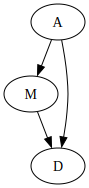

In [2]:
Dag = CausalGraphicalModel(nodes=["A", "D", "M"], edges=[("A", "D"), ("A", "M"), ("M", "D")])
Dag.draw()

In this case $A$ has two effects in $D$. First it has a first direct effect $A\rightarrow D$, which arises because younger people change faster than older people and are therefore more likely to grow incompatible with a partner. Second, it has an indirect effect, $A\rightarrow M\rightarrow D$, by influencing the marriage rate, which then influences divorce. If people get married earlier, then the marriage rate may rise, because there are more young people.

The next cell shows the product decomposition induced by the previous DAG.

In [3]:
print(Dag.get_distribution())

P(A)P(M|A)P(D|A,M)


To infer the strength of the causal relation we need more than one statistical model. Up to now, our models just estimate the total effect of $A$ in $D$ and the total effect of $M$ in $D$. Accordingly to this decomposition, there are still two more regression analyses to perform.

1. A regression model to fit the marriage rate given the age of marriage $p(M|A)$. To estimate the causal effect $A\rightarrow M$.
2. A regression model to fit the divorce rate given both the age at marriage and the rate of marriage $p(D|A,M)$. To estimate the direct effects of $A$ and $M$ in $D$, $A\rightarrow D \leftarrow M$.

### Predicting marriage rate given age at marriage

To estimate the causal effect of the age at marriage on the marriage rate, we adjust our usual model:

$$
\begin{align*}
& \text{Model 3} \\
M_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha+\beta_{AM} A_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_{AM} &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

```{image} Images/1_M_given_A.png
:alt: 1_M_given_A
:align: center
```

|  Model  | $\hat\beta_{AM}$ |   Interval 89%   |
| :-----: | :--------------: | :--------------: |
| Model 3 |       -0.69      |  (-0.85, -0.54)  |

### Predicting divorce rate given age at marriage and marriage rate

Finally, we adjust the next regression model:

$$
\begin{align*}
& \text{Model 4} \\
D_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha+\beta_M M_i+\beta_A A_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_M &\sim \textsf{Normal}(0,0.5) \\
\beta_A &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

The next table and figure summarize the estimation of the correlation parameters in the different models.

|  Model  | $\hat\beta_A$ |   Interval 89%   | $\hat\beta_M$ |  Interval 89% |
| :-----: | :-----------: | :--------------: | :-----------: | :-----------: |
| Model 1 |     -0.69     |  (-0.85, -0.54)  |       -       |       -       |
| Model 2 |       -       |         -        |     0.35      |  (0.14, 0.56) |
| Model 4 |     -0.61     |  (-0.89, -0.36)  |    -0.06      | (-0.33, 0.18) |

```{image} Images/2_DivorcePlotForest.png
:alt: 2_DivorcePlotForest
:align: center
```

From these observations we can infer the next causal Bayesian network.

```{image} Images/DagDivorce.png
:alt: DagDivorce
:align: center
```

Note that, the estimated weights of the causal Bayesian network imply that given $A$, $M$ is (almost) irrelevant for $D$ el DAG propuesta implica que dado $A$, that is (almost) $D\perp\!\!\!\perp M | A$. Furthermore, note that the total effect of $A$ in $D$ can be estimated as

$$-0.61 + (-0.69)(-0.06) = -0.57,$$

and the estimated total effect of $M$ in $D$ is

$$-0.06 + (-0.69)(-0.61) = 0.36,$$

which correspond with the values that we obtained in the first two models of this chapter.

## Residual plots

Consider the residuals of the marriage rate given the age at marriage. These residuals is the variation of marriage rate that is left over, after knowing the age at marriage. Thus, we can plot the divorce rate against these residuals. This plot would display the linear relationship between divorce and marriage rates, having conditioned already on median age of marriage.

```{image} Images/2_D_given_resid_M.png
:alt: 2_D_given_resid_M
:align: center
```

We observe that once conditioned on the age at marriage, the effect of the marriage rate on the divorce rate almost vanished completely.

Similarly, we can fit a regression model of the age given the marriage rate, and then plot the residuals of this model against the divorce rate. This plot would display the linear relationship between divorce and age at marriage, having conditioned already on marriage rate.

```{image} Images/2_D_given_resid_A.png
:alt: 2_D_given_resid_A
:align: center
```

We observe that even after conditioned on the marriage rate, age at marriage still has an effect on the divorce rate.

## Prediction plot

As we discuss in [Chapter 11](../Part4/11_ComputationalApproximations), it is impoprtant to check our model. One way to do it is to plot the observed data against the values predicted by the model, this plot is sometimes referred as the prediction plot.

The next figure shows the prediction plot for the regression model of the divorce rate given the age at marriage and the marriage rate.

```{image} Images/PredictionPlot.png
:alt: PredictionPlot
:align: center
```

## Counterfactual

Most of the philosophycal discussion presented in this section was taken from {cite}`pearl2018book`.

We think of a cause as something that makes a difference, and the difference it makes must be a difference from what would have happened without it.

Counterfactual reasoning, which **deals with what-ifs**, might strike some readers as unscientific. Indeed, empirical observation can never confirm or refute the answers to such questions since, **per definition, we cannot observe counterfactuals**. Yet our minds make very reliable and reproducible judgments all the time about what might be or might have been. We all understand, for instance, that had the rooster been silent this morning, the sun would have risen just as well.

### 426 BC Malian Gulf Tsunami

The 426 BC Malian Gulf tsunami was caused by one of a series of earthquakes which affected the course of the Peloponnesian War. It devastated the coasts of the Malian and Euboean Gulfs, Greece, in the summer of 426 BC. Thucydides inquired into its causes, and concluded that the tsunami must have been caused by an earthquake. He was thus historically the first known to correctly interpret the cause of a tsunami as a preceding geological event.

```{epigraph}
About the same time that these earthquakes were so common, the sea at Orobiae, in Euboea, retiring from the then line of coast, returned in a huge wave and invaded a great part of the town, and retreated leaving some of it still under water; so that what was once land is now sea; such of the inhabitants perishing as could not run up to the higher ground in time.... The cause, in my opinion, of this phenomenon must be sought in the earthquake. At the point where its shock has been the most violent the sea is driven back, and suddenly recoiling with redoubled force, causes the inundation. **Without an earthquake I do not see how such an accident could happen**.
```

Herodotus, in contrast, had attributed the Potidaea tsunami to the divine wrath of Poseidon.

## The ladder of causation

We can distinguish three "levels" of causal inference.

1.  At the most basic level is **association**, which corresponds to the activity of **seeing**. Seeing or observing, entails detection of regularities in our environment and is shared by many animals as well as early humans before the Cognitive Revolution. At this level, we merely observe that a set of variables are statistically related.

2. The second is the **intervention** level. The activity of **doing** corresponds to this level. Doing, entails predicting the effect(s) of deliberate alterations of the environment and choosing among these alterations to produce a desired outcome. Only a small handful of species have demonstrated elements of this skill.

3. At the highest level are **counterfactuals**, which correspond to the activity of **imaginig**. Imagining and causal relations is almost self-evident. It is useless to ask for the causes of things unless you can imagine their consequences.

```{image} Images/SpongeBobImagination.jpg
:alt: SpongeBobImagination
:align: center
:scale: 50%
```

### Do-calculus

The idea of causes and effects is much more fundamental than the idea of probability. We begin learning causes and effects before we understand language and before we know any mathematics.

Understanding the meaning of "cause" has been the focus of a long tradition of philosophers, they have tried to define causation in terms of probability, using the notion of "probability raising": $X$ causes $Y$ if $X$ raises the probability of $Y$. But this increase may come about for other reasons, including $Y$ being a cause of $X$ or some other variable, $Z$, being the cause of both of them. That’s the catch!

The proper way to rescue the probability-raising idea is with the do-operator. While $\mathbb{P}(Y|X=x)$ denotes the observational distribution, which corresponds of seeing, $\mathbb{P}(Y|\text{do}(X=x))$ corresponds to the interventional distribution, which corresponds to the process of doing. Thus $\mathbb{P}(Y|\text{do}(X=x))$ describes the causal effect of $X$ on $Y$, which can be calculated using causal Bayesian networks.

Making an event happen means that you emancipate it from all other influences. Thus we erase all the arrows leading into the intervened variable, set that variable manually to its prescribed value and continue the analysis by ordinary logic. This is because after *doing* the intervention all that is left for us to do is to *see* its effect.

Answering a counterfactual question requires us to compare the real world with a fictitious and contradictory world where we intervene some variables, setting them to their counterfactual values, leaving its past history the same as it was in the real world.

## Counterfactual plot

### Intervening the age at marriage

To exemplify the previous concepts, consider the phenomenon of predicting the divorce rate. The next figure shows the representation of our causal model in `PyMC`. Because we want to ask counterfactual questions, it implies to manipulate the data, setting the variables to the intervene values. To indicate to `PyMC` that we are going to perform these interventions, we specify our data as `MutableData`.

```{image} Images/CausalModelDivorce.png
:alt: CausalModelDivorce
:align: center
```

We start by analyzing the counterfactual effect of the age at marriage in the divorce rate and the marriage rate. The next cell shows the DAG associated with the action of intervening the age at marriage.

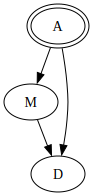

In [4]:
Dag.do('A').draw()

The next figures show the counterfactual effect of the age in the divorce rate, and the marriage rate, respectively. These graphs answer the question *what will happen with the state X, if the median age of marriage would be...?*

```{image} Images/Counter_D_given_A.png
:alt: Counter_D_given_A
:align: center
```

```{image} Images/Counter_M_given_A.png
:alt: Counter_M_given_A
:align: center
```

Thus, we can ask counterfactual questions like: What is the expected causal effect if the median age at marriage is decreased from 30 to 20?

|    Variable   | $\text{do}(A=20)$ | $\text{do}(A=30)$ | Difference |
| :-----------: | :---------------: | :---------------: | :--------: |
| Marriage rate |       32.87%      |      11.76%       |   21.11%   |
| Divorce rate  |       15.09%      |       5.84%       |    9.25%   |

### Intervening the marriage rate

Now, let us suppose that we can manupulate the marriage rate to set it at any value that we wish. The next cell shows the induced DAG for such intervention, note that we erase the arrow going from $A$ into $M$. Since we are manipulating the marriage rate, the age of marriage does not have anymore impact on the marriage rate.

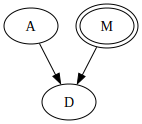

In [5]:
Dag.do('M').draw()

The next figure shows the counterfactual effect for a state whose median age at marriage corresponds with the national average, manipulating the marriage rate at different values.

```{image} Images/Counter_D_given_M.png
:alt: Counter_D_given_M
:align: center
```

## Milk and neocortex in primates

Let's take a second example where we analyze the concepts described in this chapter.

```{note}
This example was taken from {cite}`mcelreath2018statistical`.
```
The data for the example is in the file [milk.csv.csv](https://github.com/IrvingGomez/BayesianStatistics/blob/main/Data/milk.csv.csv) available in the [repository of the course](https://github.com/IrvingGomez/BayesianStatistics). The code with all the details is [21_MilkNeocortexRegression.ipynb](https://github.com/IrvingGomez/BayesianStatistics/blob/main/Codes/21_MilkNeocortexRegression.ipynb) in the [repository of the course](https://github.com/IrvingGomez/BayesianStatistics).

The neocortex, also called the neopallium, isocortex, or the six-layered cortex, is a set of layers of the mammalian cerebral cortex involved in higher-order brain functions such as sensory perception, cognition, generation of motor commands, spatial reasoning and language. It is developed in primates and highly developed in the genus Homo. A popular hypothesis has it that primates with larger brains produce more energetic milk, so that brains can grow quickly. The question here is to what extent energy content of milk, measured here by kilocalories, is related to the percentage of brain mass that is neocortex. We'll end up needing female body mass as well. As in previous example, we start by standardizing the variables. For the mass, we take its logarithm before standardizing it.

### Predicting energy given neocortex percentage

Once we have standardized the variables, we start by predicting the energy using the neocortex percentage,

$$
\begin{align*}
& \text{Model 1} \\
E_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_N N_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_N &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

The next figure and table show the scatterplot of the data with the model fitted, and the total effect of the neocortex percentage in the energy.

```{image} Images/3_E_given_N.png
:alt: 3_E_given_N
:align: center
```

|  Model  | $\hat\beta_N$ |  Interval 89%  |
| :-----: | :-----------: | :------------: |
| Model 1 |      0.12     |  (-0.23, 0.5)  |

### Predicting energy given body mass

Similarly, we predict the energy using the logarithm of the mass (standardized),

$$
\begin{align*}
& \text{Model 2} \\
E_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_M M_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_M &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

The next figure and table show the scatterplot of the data with the model fitted, and the total effect of the (logarithm) of the mass in the energy.

```{image} Images/3_E_given_M.png
:alt: 3_E_given_M
:align: center
```

|  Model  | $\hat\beta_M$ |  Interval 89%  |
| :-----: | :-----------: | :------------: |
| Model 2 |     -0.28     |  (-0.63, 0.06) |

### Predicting energy given neocortex percentage and body mass

We fit a third model using the newcortex percentage and the body mass as predictors to predict the energy, this model will give us the direct effect of these variables in the energy. 

$$
\begin{align*}
& \text{Model 3} \\
E_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_N N_i + \beta_M M_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_N &\sim \textsf{Normal}(0,0.5) \\
\beta_M &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

The next table and figure summarize the estimation of the correlation parameters in the different models.

|  Model  | $\hat\beta_N$ |   Interval 89%   | $\hat\beta_M$ |  Interval 89%  |
| :-----: | :-----------: | :--------------: | :-----------: | :------------: |
| Model 1 |      0.12     |  (-0.23, -0.5)   |       -       |        -       |
| Model 2 |       -       |         -        |    -0.28      |  (-0.63, 0.06) |
| Model 3 |      0.58     |   (0.18, 0.98)   |    -0.68      | (-1.07, -0.25) |

```{image} Images/EnergyPlotForest.png
:alt: EnergyPlotForest
:align: center
```

In the previous example we observed how including both variables revealed that one of them has little direct impact in the response variable, being most of its impact indirect. Now, in this example, we observe how including both variables revealed that both variables have an important direct impact in the response. Meanwhile, when we only include one of the variables it had little impact on the response. This phenomenon might happen when one of the variable has a positive effect, while the other has a negative effect.

### Prediction plot

In the next figure I present the prediction plot for the energy considering the multivariate regression model.

```{image} Images/PredictionPlotEnergy.png
:alt: PredictionPlotEnergy
:align: center
```

### Residual plot

For the residual plot, remember that we still need two more regression models.

We start with the model to predict body mass given newcortex percentage,

$$
\begin{align*}
& \text{Model 4} \\
M_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_M|N N_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_{M|N} &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

We then take the residuals of this model, and plot them agains the energy,

```{image} Images/3_E_given_resid_M.png
:alt: 3_E_given_resid_M
:align: center
```

Similarly, for the second residual plot, we fit the next model,

$$
\begin{align*}
& \text{Model 5} \\
N_i &\sim \textsf{Normal}(\mu_i,\sigma^2) \\
\mu_i &= \alpha + \beta_N|M M_i\\
\alpha &\sim \textsf{Normal}(0,0.2) \\
\beta_{N|M} &\sim \textsf{Normal}(0,0.5) \\
\sigma &\sim \text{Exp}(1).
\end{align*}
$$

We then take the residuals of this model, and plot them agains the energy,

```{image} Images/3_E_given_resid_N.png
:alt: 3_E_given_resid_N
:align: center
```

The next table shows the estimated correlation between neocortex percentage and body mass.

|  Model  |  $\hat\beta$  |   Interval 89%   |
| :-----: | :-----------: | :--------------: |
| Model 4 |      0.66     |   (0.37, 0.93)   |
| Model 5 |      0.66     |   (0.39, 0.95)   |

So we can draw a possible causal Bayesian network

```{image} Images/DagEnergy.png
:alt: DagEnergy
:align: center
```

Note that the total effects of N and M can be estimated as

$$
\begin{align*}
\text{Total effect of N:}&\quad 0.58+(0.66)(-0.68)\approx 0.13, \\
\text{Total effect of M:}&\quad -0.68+(0.66)(0.58)\approx -0.3,
\end{align*}
$$

which correspond with the total effects estimated my Model 1 and Model 2.

### Causal Bayesian network

To create the counterfactual plots, first we need to establish a causal model. There are at least three DAGs consistent with this data.

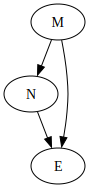

In [6]:
Dag1 = CausalGraphicalModel(nodes=["M", "N", "E"], edges=[("M", "N"), ("M", "E"), ("N", "E")])
Dag1.draw()

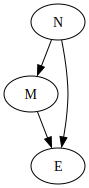

In [7]:
Dag2 = CausalGraphicalModel(nodes=["M", "N", "E"], edges=[("N", "M"), ("M", "E"), ("N", "E")])
Dag2.draw()

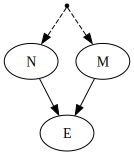

In [8]:
Dag3 = CausalGraphicalModel(nodes=["M", "N", "E"], edges=[("M", "E"), ("N", "E")], latent_edges=[("M", "N")])
Dag3.draw()

Assume that the third graph is the right one. The next graph presents the graphical representation in `PyMC`.

```{image} Images/CausalModelEnergy.png
:alt: CausalModelEnergy
:align: center
```

### Counterfactual plots

The next figures show the causal Bayesian network when we intervene the body mass, and the counterfactual plot for $N=\bar{N}$ and for different values of the intervene variable $M$.

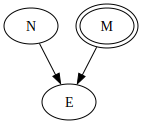

In [9]:
Dag3.do('M').draw()

```{image} Images/Counter_E_given_M.png
:alt: Counter_E_given_M
:align: center
```

The next figures show analogous results when we intervene the variable $N$.

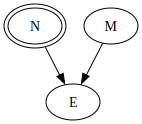

In [10]:
Dag3.do('N').draw()

```{image} Images/Counter_E_given_N.png
:alt: Counter_E_given_N
:align: center
```